In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Panda\\Desktop\\Fast_TagDE.csv")

In [3]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [4]:
df.tail()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud
4999,5000,3/10/2023 0:59,Bus,FTG-459-WSX-543,C-103,Regular,Large,330,125,"13.21331620748757, 77.55413526894684",86,KA37AB3456,Fraud


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [6]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [7]:
df.shape

(5000, 13)

In [8]:
df.size

65000

In [9]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [10]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [11]:
FTG = 'FastagID'
# 1. Fill missing values with a specific value (e.g., 0)
df[FTG] = df[FTG].fillna(0)

In [12]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [13]:
df.nunique()

Transaction_ID           5000
Timestamp                4423
Vehicle_Type                7
FastagID                 4452
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     5000
Fraud_indicator             2
dtype: int64

In [14]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

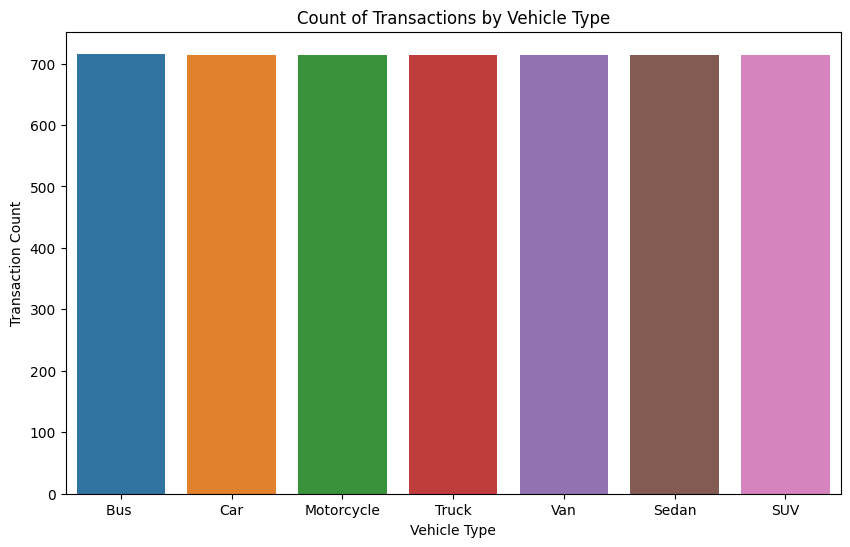

In [16]:
# Count plot for Vehicle Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Type', data=df)
plt.title('Count of Transactions by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Transaction Count')
plt.show()

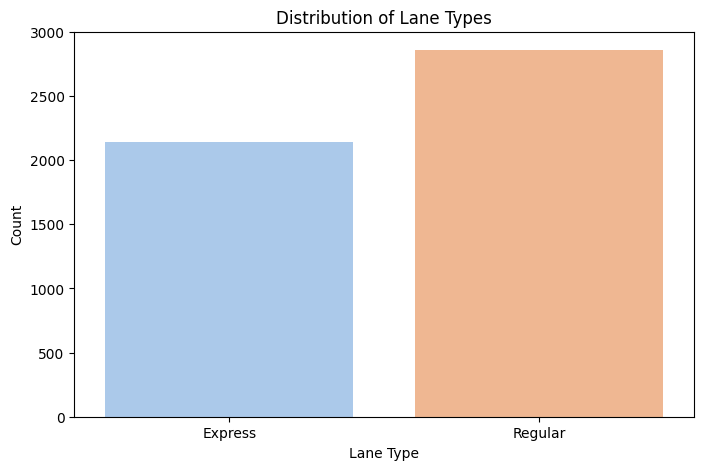

In [17]:
#Countplot for Lane Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Lane_Type', data=df, palette='pastel')
plt.title('Distribution of Lane Types')
plt.xlabel('Lane Type')
plt.ylabel('Count')
plt.show()

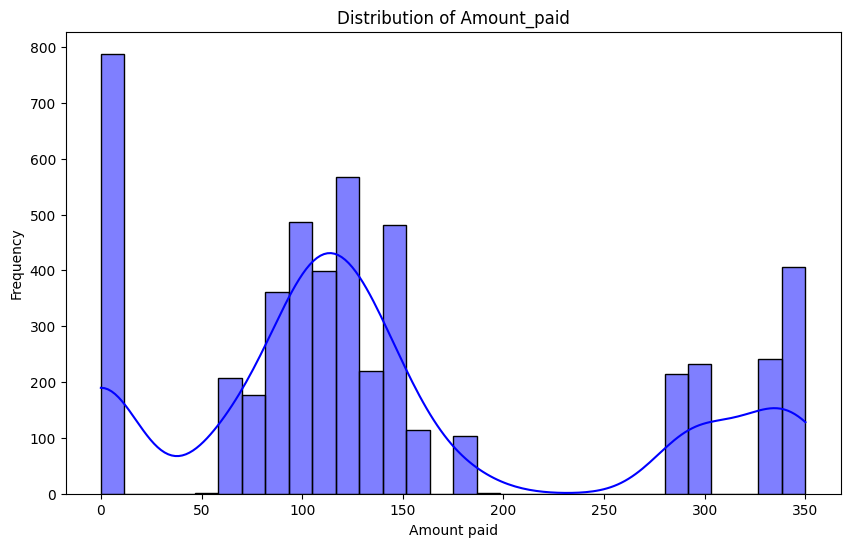

In [18]:
# Visualize the distribution of Amount using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount_paid'], bins=30, kde=True, color='blue')
plt.title('Distribution of Amount_paid')
plt.xlabel('Amount paid')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

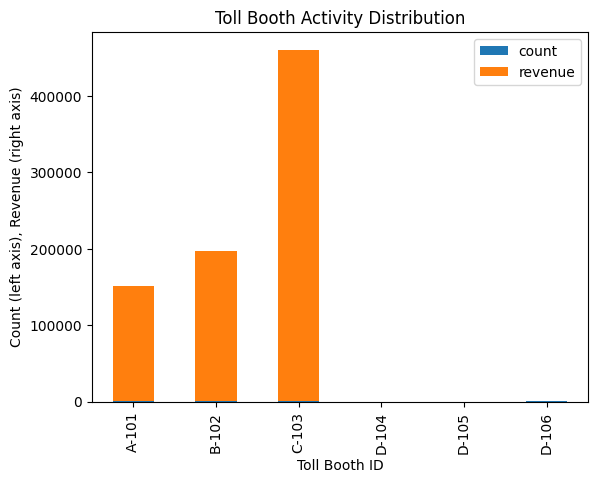

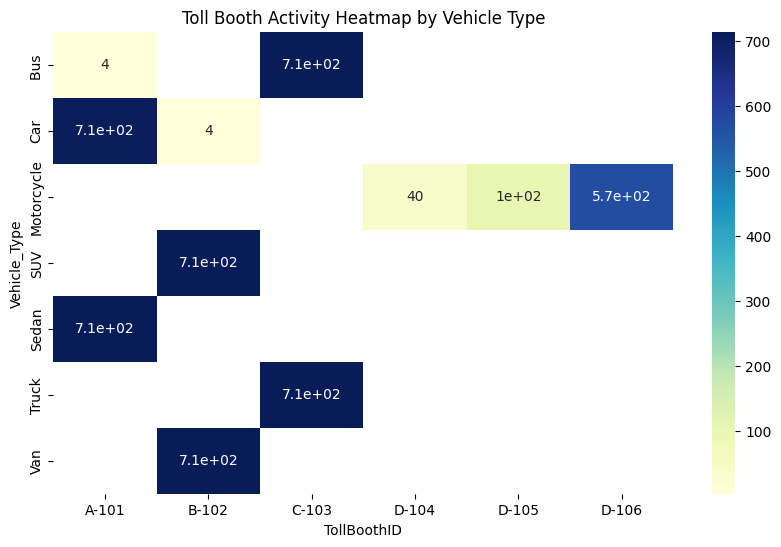

In [19]:
# Toll booth activity distribution
plt.figure(figsize=(10, 6))
df.groupby("TollBoothID").agg(count=("Transaction_ID", "count"), revenue=("Transaction_Amount", "sum")).plot(kind="bar", stacked=True)
plt.title("Toll Booth Activity Distribution")
plt.xlabel("Toll Booth ID")
plt.ylabel("Count (left axis), Revenue (right axis)")
plt.show()

# Toll booth heatmap
plt.figure(figsize=(10, 6))
pivot_table = pd.pivot_table(df, values="Transaction_ID", index="Vehicle_Type", columns="TollBoothID", aggfunc="count")
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True)
plt.title("Toll Booth Activity Heatmap by Vehicle Type")
plt.show()

<Figure size 1000x600 with 0 Axes>

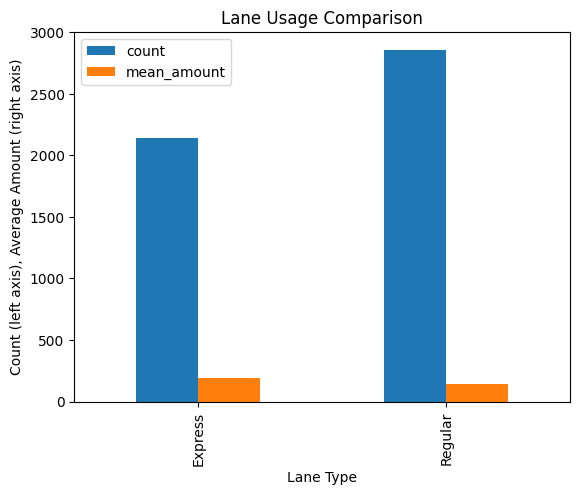

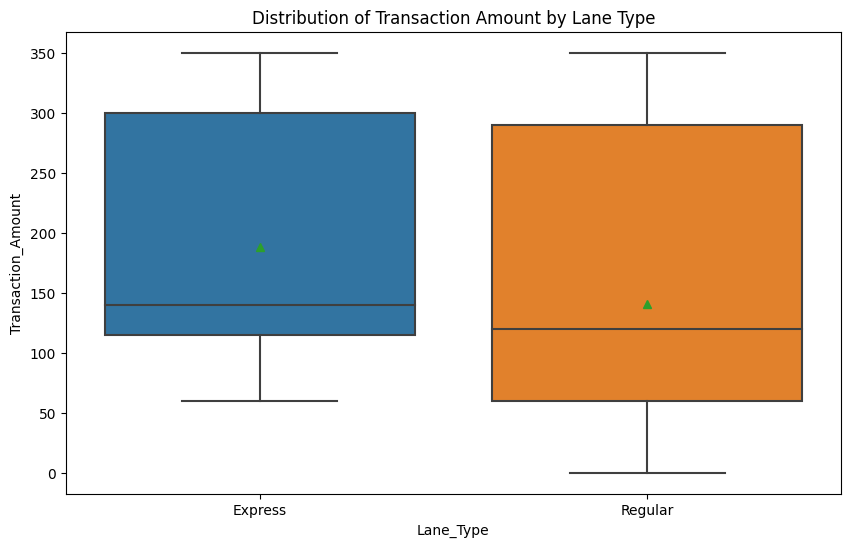

In [20]:
# Lane usage comparison
plt.figure(figsize=(10, 6))
df.groupby("Lane_Type").agg(count=("Transaction_ID", "count"), mean_amount=("Transaction_Amount", "mean")).plot(kind="bar")
plt.title("Lane Usage Comparison")
plt.xlabel("Lane Type")
plt.ylabel("Count (left axis), Average Amount (right axis)")
plt.show()

# Boxplot of transaction amount by lane type
plt.figure(figsize=(10, 6))
sns.boxplot(x="Lane_Type", y="Transaction_Amount", showmeans=True, data=df
           )
plt.title("Distribution of Transaction Amount by Lane Type")
plt.show()

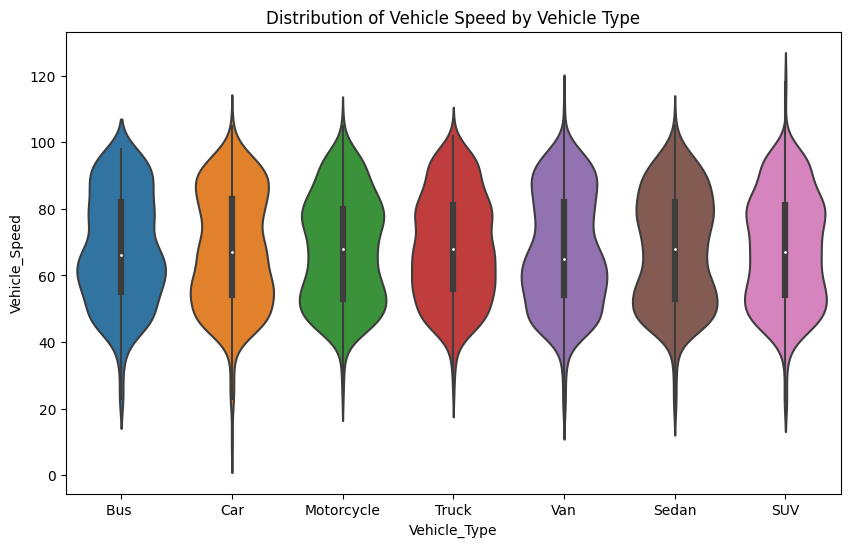

In [21]:
# Vehicle speed distribution by vehicle type
plt.figure(figsize=(10, 6))
sns.violinplot(x="Vehicle_Type", y="Vehicle_Speed", data=df)
plt.title("Distribution of Vehicle Speed by Vehicle Type")
plt.show()



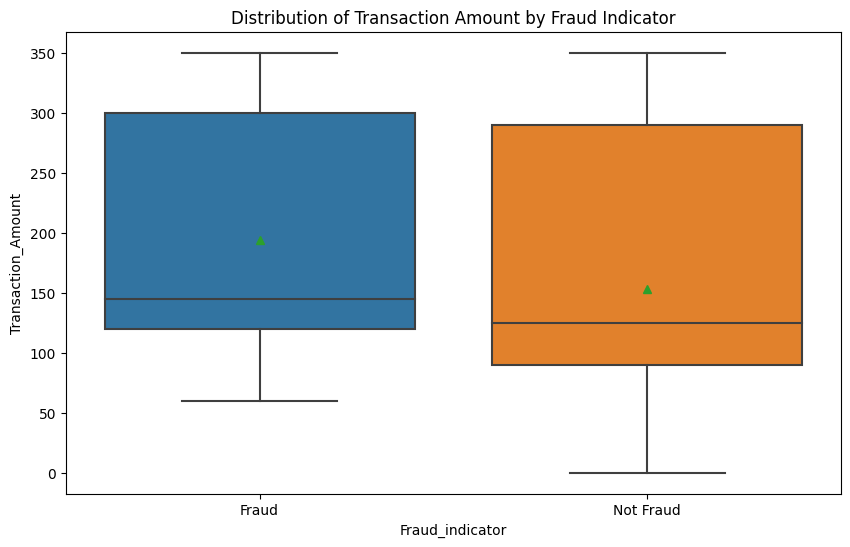

In [22]:
# Boxplot of transaction amount by fraud indicator
plt.figure(figsize=(10, 6))
sns.boxplot(x="Fraud_indicator", y="Transaction_Amount", showmeans=True, data=df)
plt.title("Distribution of Transaction Amount by Fraud Indicator")
plt.show()

In [23]:
df['is_duplicate_fastag'] = df.duplicated(subset='FastagID', keep=False)
df['is_duplicate_plate'] = df.duplicated(subset='Vehicle_Plate_Number', keep=False)

In [24]:
label_encoder = LabelEncoder()
df['Vehicle_Type'] = label_encoder.fit_transform(df['Vehicle_Type'])
df['Lane_Type'] = label_encoder.fit_transform(df['Lane_Type'])
df['Geographical_Location'] = label_encoder.fit_transform(df['Geographical_Location'])

for col in ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coerce errors to NaN
    df[col].fillna(df[col].mean(), inplace=True)  # Impute NaN with mean (or other appropriate strateg

In [25]:
df = df.drop(['Vehicle_Speed', 'Timestamp'], axis=1)

In [26]:
df['Fraud_indicator'] = df['Fraud_indicator'].map({'Fraud': 1, 'Not Fraud': 0})

In [27]:
features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Type', 'Lane_Type', 'Geographical_Location']

In [28]:
X = df[features]
y = df['Fraud_indicator']

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC()
}

In [31]:
# Train, predict, and evaluate models
classified_data = pd.DataFrame()  # Dataframe to store classified data

In [32]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Save the classified data to the dataframe
    classified_data[name + '_Predicted'] = y_pred

In [33]:
# Concatenate original data with classified data
classified_data = pd.concat([X_test, y_test, classified_data], axis=1)

In [34]:
# Save the classified data to an Excel file
classified_data.to_excel("classified_data_all_classifiers.xlsx", index=False)

In [35]:
# Display the dataframe
print("\nClassified Data:")
print(classified_data.head())


Classified Data:
      Transaction_Amount  Amount_paid  Vehicle_Type  Lane_Type  \
1501               300.0        300.0           5.0        1.0   
2586                 0.0          0.0           2.0        1.0   
2653               180.0        180.0           3.0        1.0   
1055               120.0        120.0           4.0        1.0   
705                100.0        100.0           4.0        1.0   

      Geographical_Location  Fraud_indicator  Decision Tree_Predicted  \
1501                    1.0              0.0                      NaN   
2586                    3.0              0.0                      NaN   
2653                    3.0              0.0                      NaN   
1055                    0.0              0.0                      NaN   
705                     2.0              0.0                      0.0   

      Naive Bayes_Predicted  Random Forest_Predicted  XGBoost_Predicted  \
1501                    NaN                      NaN                NaN

In [36]:
# Train, predict, and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'Confusion Matrix': confusion}

In [37]:
label_encoder = LabelEncoder()
df['Vehicle_Type'] = label_encoder.fit_transform(df['Vehicle_Type'])
df['Lane_Type'] = label_encoder.fit_transform(df['Lane_Type'])
df['Geographical_Location'] = label_encoder.fit_transform(df['Geographical_Location'])

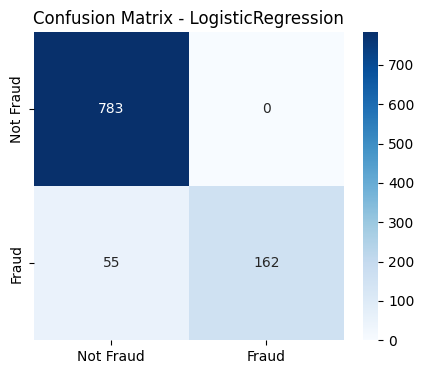

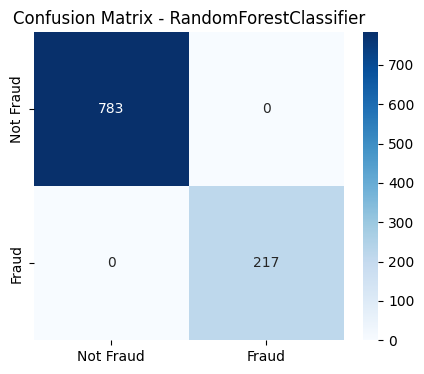

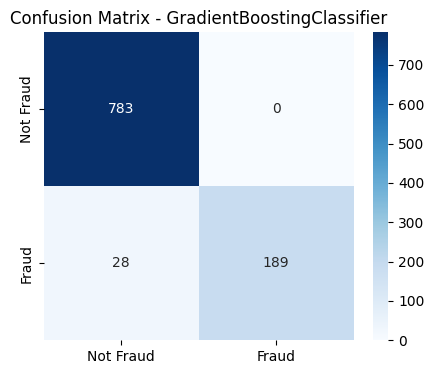

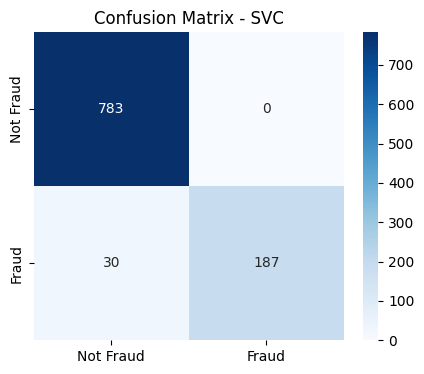

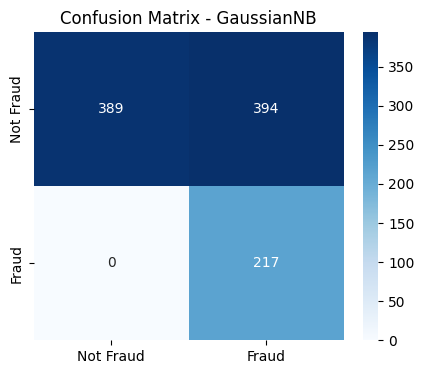

                            Accuracy   Precision      Recall    F1 Score
LogisticRegression              94.5  100.000000   74.654378   85.488127
RandomForestClassifier         100.0  100.000000  100.000000  100.000000
GradientBoostingClassifier      97.2  100.000000   87.096774   93.103448
SVC                             97.0  100.000000   86.175115   92.574257
GaussianNB                      60.6   35.515548  100.000000   52.415459


In [38]:
# Preprocess the data, e.g., handle missing values, convert categorical variables to numerical, etc.
# Select relevant features and target variable
# Feature selection
features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Type', 'Lane_Type', 'Geographical_Location']
X = df[features]
y = df['Fraud_indicator']
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Transaction_Amount', 'Amount_paid', 'Vehicle_Type', 'Lane_Type', 'Geographical_Location'], drop_first=True)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a list of classifiers
classifiers = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    SVC(kernel='linear', random_state=42),
    GaussianNB()
]
# Dictionary to store results
results = {}
# Iterate through classifiers
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Store results
    results[clf_name] = {
        'Accuracy': accuracy*100,
        'Precision': precision*100,
        'Recall': recall*100,
        'F1 Score': f1*100
    }
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.show()
# Display results
results_data = pd.DataFrame(results).T
print(results_data)

In [39]:
# Dictionary to store results, including train and test accuracy
results = {}

# Iterate through classifiers
for clf in classifiers:
    clf_name = clf.__class__.__name__

    # Fit the model on the training set
    clf.fit(X_train, y_train)

    # Calculate train accuracy
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Calculate test accuracy
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store results, including train and test accuracy
    results[clf_name] = {
        'Train Accuracy': train_accuracy * 100,
        'Test Accuracy': test_accuracy * 100,
        'Precision': precision_score(y_test, y_test_pred) * 100,
        'Recall': recall_score(y_test, y_test_pred) * 100,
        'F1 Score': f1_score(y_test, y_test_pred) * 100
    }

# Display results, including train and test accuracy
results_data = pd.DataFrame(results).T
print(results_data)


                            Train Accuracy  Test Accuracy   Precision  \
LogisticRegression                  95.625           94.5  100.000000   
RandomForestClassifier             100.000          100.0  100.000000   
GradientBoostingClassifier          96.775           97.2  100.000000   
SVC                                 97.525           97.0  100.000000   
GaussianNB                          57.575           60.6   35.515548   

                                Recall    F1 Score  
LogisticRegression           74.654378   85.488127  
RandomForestClassifier      100.000000  100.000000  
GradientBoostingClassifier   87.096774   93.103448  
SVC                          86.175115   92.574257  
GaussianNB                  100.000000   52.415459  
